# DLMI - Lymphocytosis classification
## Data exploration

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use("seaborn-whitegrid")

In [2]:
data_dir = "../../data/dlmi-lymphocytosis-classification/"

In [3]:
compute_age = lambda x: 2024 - int(x.replace("-", "/").split("/")[-1])
compute_age("11-3-1933")

91

In [4]:
clinical_annotation_df = pd.read_csv(data_dir + "clinical_annotation.csv", index_col=0)
clinical_annotation_df.head(15)

,ID,LABEL,GENDER,DOB,LYMPH_COUNT
0,P26,1,M,11/3/1933,11.20
1,P183,1,M,5/15/1942,12.80
2,P89,1,M,6/19/1935,9.60
3,P123,1,M,1/27/1931,122.60
4,P61,1,F,3/5/1931,11.60
5,P112,1,F,5/9/1946,22.10
6,P71,-1,M,1/17/1946,5.76
7,P63,0,F,7/20/1997,6.30
8,P184,1,F,6/12/1932,220.00
9,P16,-1,M,3/5/1940,32.00


In [5]:
clinical_annotation_df["AGE"] = clinical_annotation_df["DOB"].apply(compute_age)
clinical_annotation_df.head(5)

,ID,LABEL,GENDER,DOB,LYMPH_COUNT,AGE
0,P26,1,M,11/3/1933,11.2,91
1,P183,1,M,5/15/1942,12.8,82
2,P89,1,M,6/19/1935,9.6,89
3,P123,1,M,1/27/1931,122.6,93
4,P61,1,F,3/5/1931,11.6,93


In [6]:
clinical_annotation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           205 non-null    object 
 1   LABEL        205 non-null    int64  
 2   GENDER       205 non-null    object 
 3   DOB          205 non-null    object 
 4   LYMPH_COUNT  205 non-null    float64
 5   AGE          205 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.2+ KB


In [7]:
clinical_annotation_df.describe()

,LABEL,LYMPH_COUNT,AGE
count,205.000000,205.000000,205.000000
mean,0.346341,26.002878,72.131707
std,0.799540,46.150577,18.098511
min,-1.000000,2.280000,25.000000
25%,0.000000,5.050000,62.000000
50%,1.000000,7.500000,76.000000
75%,1.000000,20.620000,87.000000
max,1.000000,295.000000,103.000000


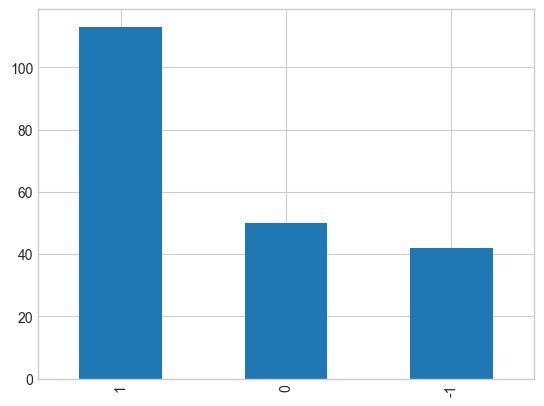

In [8]:
clinical_annotation_df["LABEL"].value_counts().plot.bar()
plt.show()

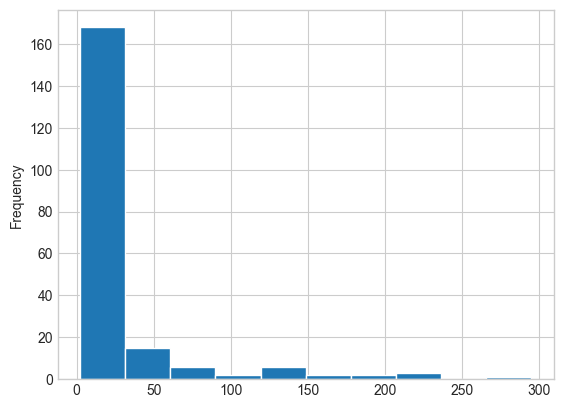

In [9]:
clinical_annotation_df["LYMPH_COUNT"].plot.hist(edgecolor="white")
plt.show()

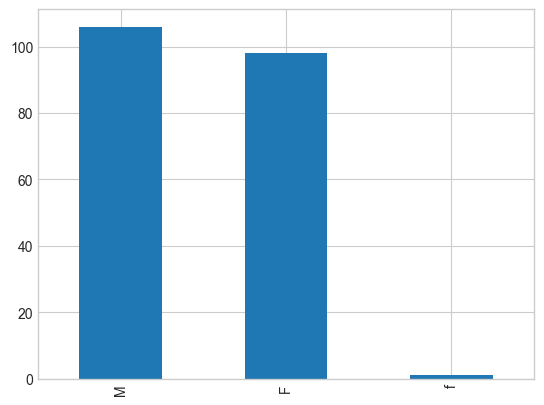

In [10]:
clinical_annotation_df["GENDER"].value_counts().plot.bar()
plt.show()

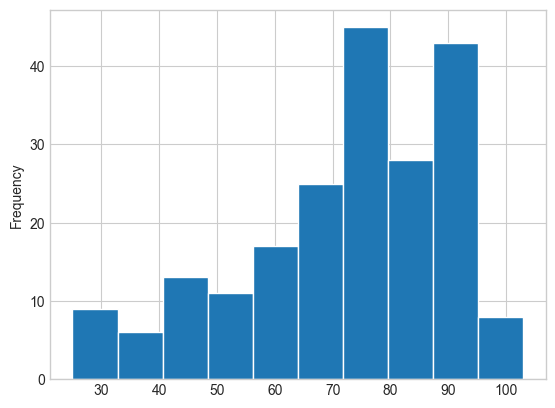

In [11]:
clinical_annotation_df["AGE"].plot.hist(edgecolor="white")
plt.show()

In [12]:
trainset_true_df = pd.read_csv(data_dir + "trainset/trainset_true.csv")
trainset_true_df["AGE"] = trainset_true_df["DOB"].apply(compute_age)
trainset_true_df.head(15)

,ID,LABEL,GENDER,DOB,LYMPH_COUNT,AGE
0,P26,1,M,11/3/1933,11.20,91
1,P183,1,M,5/15/1942,12.80,82
2,P89,1,M,6/19/1935,9.60,89
3,P123,1,M,1/27/1931,122.60,93
4,P61,1,F,3/5/1931,11.60,93
5,P112,1,F,5/9/1946,22.10,78
6,P63,0,F,7/20/1997,6.30,27
7,P184,1,F,6/12/1932,220.00,92
8,P23,1,M,3/19/1942,211.00,82
9,P100,1,M,9/26/1947,5.30,77


In [13]:
trainset_true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           163 non-null    object 
 1   LABEL        163 non-null    int64  
 2   GENDER       163 non-null    object 
 3   DOB          163 non-null    object 
 4   LYMPH_COUNT  163 non-null    float64
 5   AGE          163 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 7.8+ KB


In [14]:
trainset_true_df.describe()

,LABEL,LYMPH_COUNT,AGE
count,163.000000,163.000000,163.000000
mean,0.693252,26.423926,72.760736
std,0.462565,46.784365,17.664862
min,0.000000,2.280000,26.000000
25%,0.000000,5.045000,64.000000
50%,1.000000,7.810000,76.000000
75%,1.000000,20.445000,87.500000
max,1.000000,295.000000,103.000000


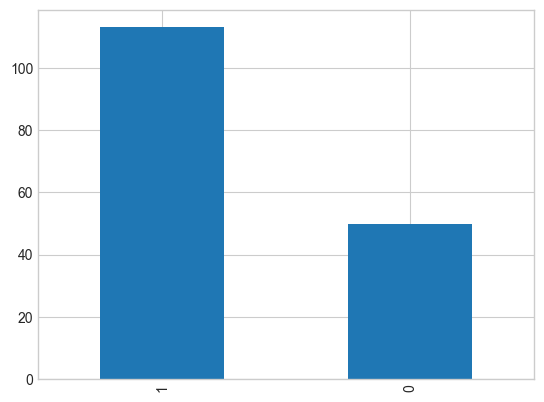

In [15]:
trainset_true_df["LABEL"].value_counts().plot.bar()
plt.show()

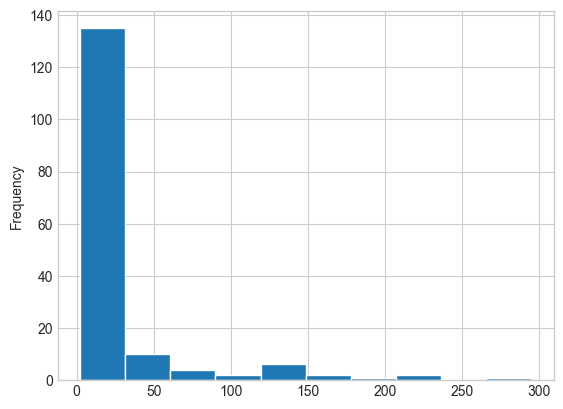

In [16]:
trainset_true_df["LYMPH_COUNT"].plot.hist(edgecolor="white")
plt.show()

In [17]:
trainset_true_df.groupby("LABEL")["LYMPH_COUNT"].describe()

,count,mean,std,min,25%,50%,75%,max
LABEL,,,,,,,,
0,50.0,5.005200,1.003228,4.01,4.2225,4.505,5.7075,7.68
1,113.0,35.901239,53.572784,2.28,6.9400,12.430,31.1100,295.00


In [18]:
trainset_true_df.groupby("LABEL")["AGE"].describe()

,count,mean,std,min,25%,50%,75%,max
LABEL,,,,,,,,
0,50.0,58.260000,19.766814,26.0,41.5,56.5,75.75,97.0
1,113.0,79.176991,12.041765,37.0,72.0,80.0,89.00,103.0


In [19]:
testset_data_df = pd.read_csv(data_dir + "testset/testset_data.csv")
testset_data_df.head(15)

,ID,LABEL,GENDER,DOB,LYMPH_COUNT
0,P71,-1,M,1/17/1946,5.76
1,P16,-1,M,3/5/1940,32.00
2,P114,-1,M,6/16/1929,4.60
3,P170,-1,M,11/3/1933,4.80
4,P98,-1,F,5/14/1970,6.24
5,P69,-1,M,4/4/1979,7.47
6,P92,-1,F,3/21/1947,55.26
7,P132,-1,M,8/24/1945,24.70
8,P81,-1,M,11/22/1958,64.86
9,P73,-1,F,6/21/1923,4.28


In [20]:
testset_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     object 
 1   LABEL        42 non-null     int64  
 2   GENDER       42 non-null     object 
 3   DOB          42 non-null     object 
 4   LYMPH_COUNT  42 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ KB


In [21]:
testset_data_df.describe()

,LABEL,LYMPH_COUNT
count,42.0,42.000000
mean,-1.0,24.368810
std,0.0,44.109553
min,-1.0,4.080000
25%,-1.0,5.172500
50%,-1.0,6.765000
75%,-1.0,22.382500
max,-1.0,217.590000


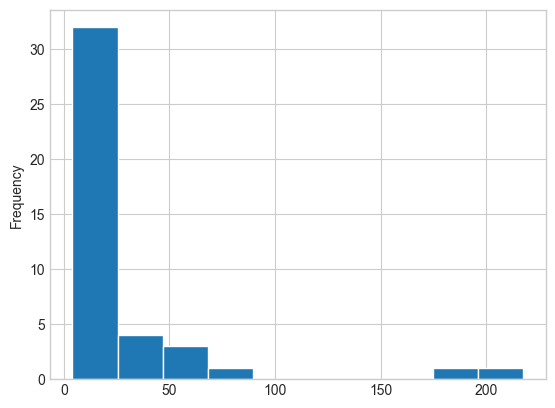

In [22]:
testset_data_df["LYMPH_COUNT"].plot.hist(edgecolor="white")
plt.show()

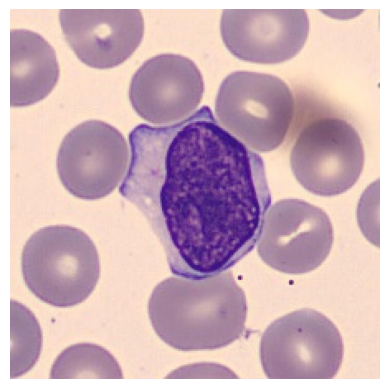

In [23]:
from PIL import Image

image_path = data_dir + "trainset/P0/000000.jpg"
image_pil = Image.open(image_path)

image_np = np.array(image_pil)

plt.style.use("default")
plt.imshow(image_np)
plt.axis("off")
plt.show()

In [24]:
def plot(split_name, patient_id, n_images=50):
    patient_path = os.path.join(data_dir, split_name, patient_id)

    n_cols = 3
    n_rows = (n_images // n_cols) + int(n_images % n_cols > 0)

    plt.figure(figsize=(n_cols * 5, n_rows * 5))
    #plt.subplot(n_rows, n_cols)

    for i, image_name in enumerate(os.listdir(patient_path), 1):
        image_path = os.path.join(patient_path, image_name)
        image_pil = Image.open(image_path)
        image_np = np.array(image_pil)

        plt.subplot(n_rows, n_cols, i)
        plt.imshow(image_np)
        plt.axis("off")

        if i >= n_images:
            break

    plt.show()

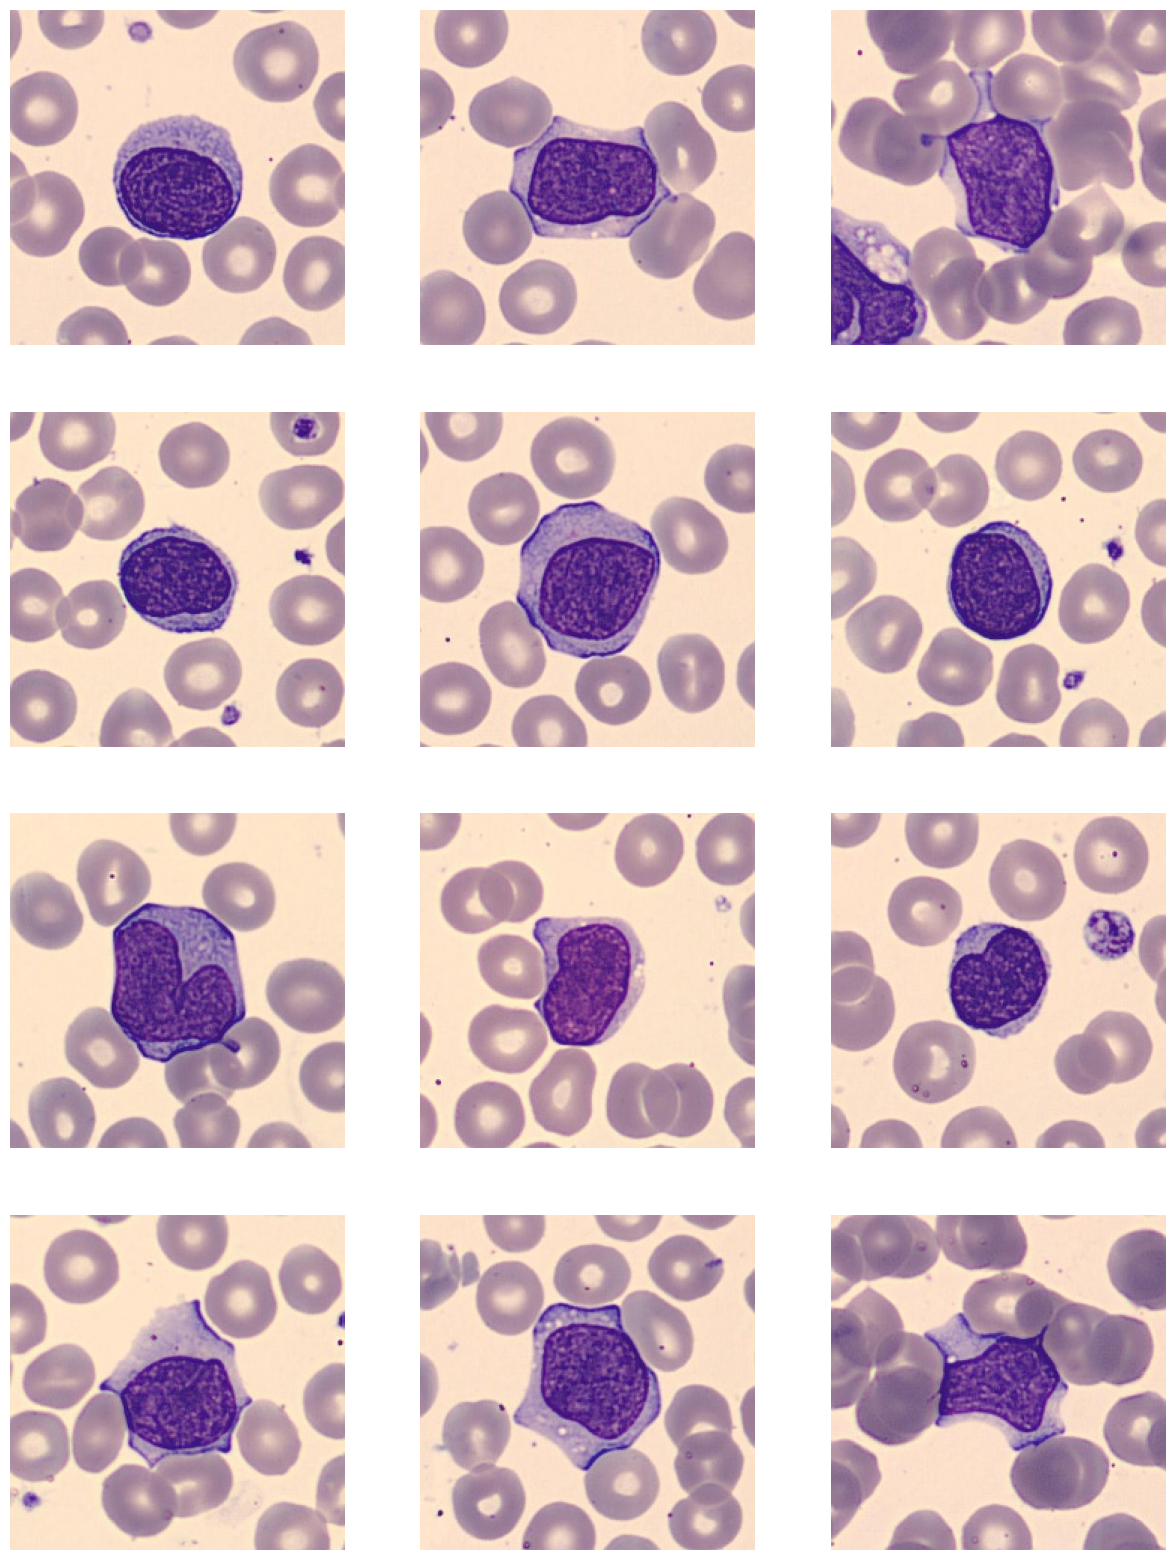

In [25]:
plot("trainset", "P0", 12)

In [26]:
n_images_per_patients = []
for patient_id in trainset_true_df["ID"]:
    patient_path = os.path.join(data_dir, "trainset", patient_id)
    n_images = len(os.listdir(patient_path))
    n_images_per_patients.append(n_images)

trainset_true_df["N_IMAGES"] = n_images_per_patients
trainset_true_df.head(10)

,ID,LABEL,GENDER,DOB,LYMPH_COUNT,AGE,N_IMAGES
0,P26,1,M,11/3/1933,11.2,91,100
1,P183,1,M,5/15/1942,12.8,82,63
2,P89,1,M,6/19/1935,9.6,89,52
3,P123,1,M,1/27/1931,122.6,93,173
4,P61,1,F,3/5/1931,11.6,93,56
5,P112,1,F,5/9/1946,22.1,78,171
6,P63,0,F,7/20/1997,6.3,27,46
7,P184,1,F,6/12/1932,220.0,92,188
8,P23,1,M,3/19/1942,211.0,82,173
9,P100,1,M,9/26/1947,5.3,77,43


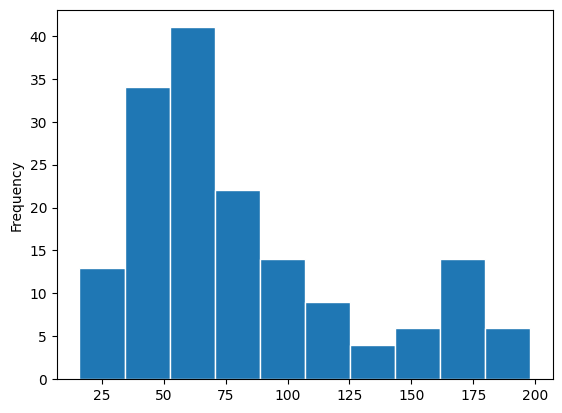

In [29]:
trainset_true_df["N_IMAGES"].plot.hist(edgecolor="white")
plt.show()

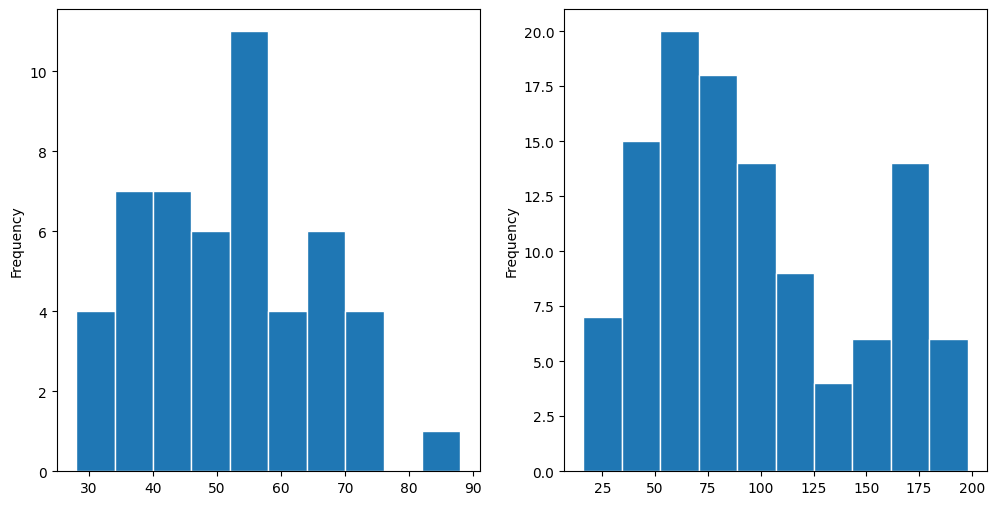

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
trainset_true_df[trainset_true_df["LABEL"]==0]["N_IMAGES"].plot.hist(edgecolor="white")
plt.subplot(122)
trainset_true_df[trainset_true_df["LABEL"]==1]["N_IMAGES"].plot.hist(edgecolor="white")
plt.show()

In [31]:
n_images_0 = trainset_true_df[trainset_true_df["LABEL"]==0]["N_IMAGES"].sum()
n_images_1 = trainset_true_df[trainset_true_df["LABEL"]==1]["N_IMAGES"].sum()
n_images_0, n_images_1

(2592, 10861)

In [33]:
n_images_per_patients = []
for patient_id in testset_data_df["ID"]:
    patient_path = os.path.join(data_dir, "testset", patient_id)
    n_images = len(os.listdir(patient_path))
    n_images_per_patients.append(n_images)

testset_data_df["N_IMAGES"] = n_images_per_patients
testset_data_df.head(10)

,ID,LABEL,GENDER,DOB,LYMPH_COUNT,N_IMAGES
0,P71,-1,M,1/17/1946,5.76,52
1,P16,-1,M,3/5/1940,32.00,166
2,P114,-1,M,6/16/1929,4.60,38
3,P170,-1,M,11/3/1933,4.80,50
4,P98,-1,F,5/14/1970,6.24,42
5,P69,-1,M,4/4/1979,7.47,85
6,P92,-1,F,3/21/1947,55.26,115
7,P132,-1,M,8/24/1945,24.70,134
8,P81,-1,M,11/22/1958,64.86,137
9,P73,-1,F,6/21/1923,4.28,26


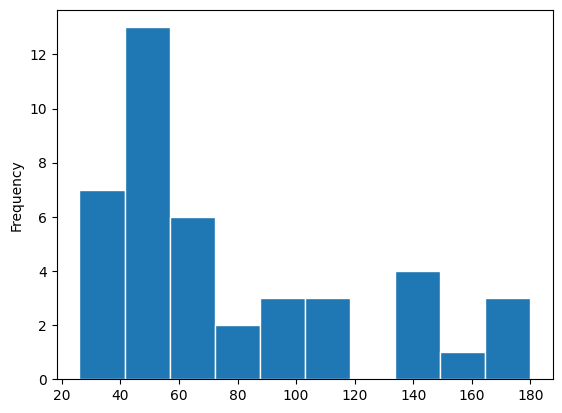

In [34]:
testset_data_df["N_IMAGES"].plot.hist(edgecolor="white")
plt.show()